# 문제 1

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
dataframe = pd.read_csv("iris.csv")
dataset = dataframe.values
X = dataset[:, 0:4].astype(float)
Y = dataset[:, 4]

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# One-hot encoding
dummy_y = pd.get_dummies(encoded_Y).values

# Divide train, test
train_X, test_X, train_y, test_y = train_test_split(X, dummy_y, test_size=0.4, random_state=321)



In [4]:
print(len(train_X),len(test_X))

90 60


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


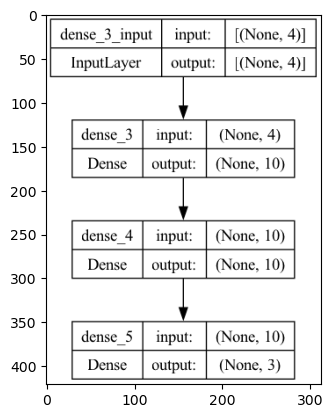

In [7]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()  # Show model structure


import tensorflow as tf
from matplotlib import pyplot as plt 
from matplotlib import image as mpimg
# Plot the model and save it to an image file
tf.keras.utils.plot_model(model, show_shapes=True, to_file='/Users/haseung-won/Desktop/학교/4-1/딥러닝/Cloud-Deep_learning_class/chap10/model.png')
# Load the saved image and display it
image = mpimg.imread("model.png")
plt.imshow(image)
plt.show()

In [8]:
epochs = 50
batch_size = 10

model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()  # Show model structure

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

disp = model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_X, test_y))

pred = model.predict(test_X)
print(pred)

y_classes = [np.argmax(y, axis=None, out=None) for y in pred]
print(y_classes)  # Result of prediction

# Model performance
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                50        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 275 (1.07 KB)
Trainable params: 275 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
9/9 [==============================] - 0s 16ms/step - loss: 1.0576 - accuracy: 0.3667 - val_loss: 1.0695 - val_accuracy: 0.2833
Epoch 2/50
9/9 [=

In [12]:
result=[]

epochs = [100,150,200]
batch_size = 10


for epoch in epochs:
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.summary()  # Show model structure

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



    disp = model.fit(train_X, train_y, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(test_X, test_y))

    pred = model.predict(test_X)

    y_classes = [np.argmax(y, axis=None, out=None) for y in pred]

    # Model performance
    score = model.evaluate(test_X, test_y, verbose=0)

    result.append([score[0],score[1]])
epoch=100
for i in result:
    print(f"epoch {epoch}")
    print('Test loss:', i[0])
    print('Test accuracy:', i[1])
    epoch+=50

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                50        
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
9/9 [==============================] - 0s 13ms/step - loss: 1.2720 - accuracy: 0.3667 - val_loss: 1.3512 - val_accuracy: 0.3667
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 1.0753 - accuracy: 0.6556 - val_loss: 1.1247 - val_accuracy: 0.6000
E